<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-Results" data-toc-modified-id="Predicting-Results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicting Results</a></span></li><li><span><a href="#Read-in-Results-and-Features" data-toc-modified-id="Read-in-Results-and-Features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read in Results and Features</a></span><ul class="toc-item"><li><span><a href="#Read-in-results-and-statistics-dataset" data-toc-modified-id="Read-in-results-and-statistics-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read in results and statistics dataset</a></span></li><li><span><a href="#Read-in-Bookie-Odds-dataset" data-toc-modified-id="Read-in-Bookie-Odds-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read in Bookie Odds dataset</a></span></li><li><span><a href="#Create-single-line-df" data-toc-modified-id="Create-single-line-df-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create single line df</a></span></li><li><span><a href="#Feature-labelling" data-toc-modified-id="Feature-labelling-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Feature labelling</a></span><ul class="toc-item"><li><span><a href="#Split-out-seasons" data-toc-modified-id="Split-out-seasons-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Split out seasons</a></span></li><li><span><a href="#Create-target-goals-dataframe" data-toc-modified-id="Create-target-goals-dataframe-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Create target goals dataframe</a></span></li></ul></li></ul></li><li><span><a href="#Create-test-per-team-modeling-variables" data-toc-modified-id="Create-test-per-team-modeling-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create test per team modeling variables</a></span><ul class="toc-item"><li><span><a href="#Moving-Average-Functions" data-toc-modified-id="Moving-Average-Functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Moving Average Functions</a></span></li><li><span><a href="#Produce-file" data-toc-modified-id="Produce-file-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Produce file</a></span></li></ul></li><li><span><a href="#Creating-a-single-line-modelling-dataset" data-toc-modified-id="Creating-a-single-line-modelling-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating a single line modelling dataset</a></span></li><li><span><a href="#Simple-model" data-toc-modified-id="Simple-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simple model</a></span><ul class="toc-item"><li><span><a href="#Model-Base-and-Span-functions" data-toc-modified-id="Model-Base-and-Span-functions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model Base and Span functions</a></span></li><li><span><a href="#Optimising-Span" data-toc-modified-id="Optimising-Span-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Optimising Span</a></span></li></ul></li><li><span><a href="#Test-ewm" data-toc-modified-id="Test-ewm-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test ewm</a></span><ul class="toc-item"><li><span><a href="#Compare-EMA-and-Moving-average-log-loss" data-toc-modified-id="Compare-EMA-and-Moving-average-log-loss-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compare EMA and Moving average log loss</a></span></li><li><span><a href="#Compare-accuracy-and-Log-loss-on-training-seasons" data-toc-modified-id="Compare-accuracy-and-Log-loss-on-training-seasons-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Compare accuracy and Log loss on training seasons</a></span></li></ul></li><li><span><a href="#Gambling-Returns" data-toc-modified-id="Gambling-Returns-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gambling Returns</a></span></li><li><span><a href="#End-to-end-application-of-simple-model" data-toc-modified-id="End-to-end-application-of-simple-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>End to end application of simple model</a></span><ul class="toc-item"><li><span><a href="#Compare-accuracy-and-log-loss-to-Bookie-per-season" data-toc-modified-id="Compare-accuracy-and-log-loss-to-Bookie-per-season-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Compare accuracy and log loss to Bookie per season</a></span></li></ul></li></ul></div>

# Predicting Results

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import log_loss


from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn import ensemble, metrics, model_selection as ms, preprocessing, tree
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import linear_model as lm
from sklearn import svm
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB

import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', 50)

import datetime


from pathlib import Path
import os
from os import listdir
from os.path import isfile, join

# Read in Results and Features

## Read in results and statistics dataset

In [47]:
results = pd.read_csv(r"C:\\Users\Byron\Documents\Football Predictions\PremierLeaguePredictions\data\ff_us_1419.csv").drop("Unnamed: 0",axis=1)
results.tail()

,season,gameweek,matchid,fixture,matchdate,f_Team,f_HmGame,f_Possession,f_Touches - Final Third,f_Touches - Penalty Area,f_Passes - Final Third - Successful,f_Chances Created,f_Goals,f_Goals From Penalties,f_Goal Attempts,f_Shots - Inside Box,f_Big Chances Total,f_Shots On Target,f_Goal Attempts In Box Conceded,f_Shots Conceded,f_Shots On Target Conceded,f_Big Chances Conceded,f_xG Open Play,f_xG Expected Goals,f_xA Expected Assists,f_Goals Conceded,f_xG Conceded,f_Touches - Final Third Conceded,f_Touches - Penalty Area Conceded,f_Passes - Final Third - Successful Conceded,f_xG Open Play Conceded,f_US xG,f_US xG Conceded,f_Points,f_Chances Conceded,gw_no,f_Touches - Final Third log,f_xA Expected Assists Conceded
4351,2019,Gameweek 28,/matches/1059980/,Watford vs Liverpool,2020-02-29 17:30:00,Liverpool,0,71.0,276,31,148,5,0,0,7,3,0,1,10,14,5,6,0.20,0.29,0.58,3,2.34,123,24,52,1.67,0.200603,2.73228,0,10,28,5.620401,1.01
4352,2019,Gameweek 28,/matches/1059975/,Everton vs Manchester United,2020-03-01 14:00:00,Everton,1,43.1,182,25,55,8,1,0,16,12,4,5,5,14,5,1,1.32,2.09,0.92,1,1.13,189,17,97,1.07,2.101640,1.12548,1,11,28,5.204007,0.54
4353,2019,Gameweek 28,/matches/1059975/,Everton vs Manchester United,2020-03-01 14:00:00,Manchester United,0,56.9,189,17,97,11,1,0,14,5,1,5,12,16,5,4,1.07,1.13,0.54,1,2.09,182,25,55,1.32,1.125480,2.10164,1,8,28,5.241747,0.92
4354,2019,Gameweek 28,/matches/1059979/,Tottenham Hotspur vs Wolverhampton Wanderers,2020-03-01 14:00:00,Tottenham Hotspur,1,65.9,189,23,82,9,2,0,13,10,3,5,11,14,4,4,1.61,1.70,0.42,3,2.56,128,25,42,2.18,1.630780,2.62405,0,10,28,5.241747,0.48
4355,2019,Gameweek 28,/matches/1059979/,Tottenham Hotspur vs Wolverhampton Wanderers,2020-03-01 14:00:00,Wolverhampton Wanderers,0,34.1,128,25,42,10,3,0,14,11,4,4,10,13,5,3,2.18,2.56,0.48,2,1.70,189,23,82,1.61,2.624050,1.63078,3,9,28,4.852030,0.42


## Read in Bookie Odds dataset

In [48]:
odds = pd.read_csv(r"C:\\Users\Byron\Documents\Football Predictions\PremierLeaguePredictions\data\bookie_odds.csv").drop("Unnamed: 0",axis=1)
odds.tail()

,league,season,Date,fixture,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,BookieHomeOdds,BookieDrawOdds,BookieAwayOdds,bookie,BookieHomeProb,BookieDrawProb,BookieAwayProb,BookieMargin,BookiePredResult,BookiePredResultProb,BookieFinalResultProb,BookiePredCorrect
2183,EPL,2018,09/02/2019,Huddersfield Town vs Arsenal,Huddersfield,Arsenal,1.0,2.0,A,0.0,2.0,A,5.75,4.40,1.60,Bet365,0.173913,0.227273,0.625000,2.618577,A,0.625000,0.625000,1
2184,EPL,2018,07/10/2018,Fulham vs Arsenal,Fulham,Arsenal,1.0,5.0,A,1.0,1.0,D,5.25,4.33,1.66,Bet365,0.190476,0.230947,0.602410,2.383271,A,0.602410,0.602410,1
2185,EPL,2018,24/04/2019,Wolverhampton Wanderers vs Arsenal,Wolves,Arsenal,3.0,1.0,H,3.0,0.0,H,2.90,3.50,2.55,Bet365,0.344828,0.285714,0.392157,2.269873,A,0.392157,0.344828,0
2186,EPL,2018,02/09/2018,Cardiff City vs Arsenal,Cardiff,Arsenal,2.0,3.0,A,1.0,1.0,D,6.50,4.33,1.57,Bet365,0.153846,0.230947,0.636943,2.173571,A,0.636943,0.636943,1
2187,EPL,2019,21/10/2019,Sheffield United vs Arsenal,Sheffield United,Arsenal,1.0,0.0,H,1.0,0.0,H,3.90,3.75,1.90,Bet365,0.256410,0.266667,0.526316,4.939271,A,0.526316,0.256410,0


Clean the dataset and create a bookie dataset to join on to our modelling dataset later for comparison.

In [49]:
odds_clean = odds[["season","fixture","FTR","bookie","BookieHomeOdds","BookieDrawOdds"
                  ,"BookieAwayOdds","BookieHomeProb","BookieDrawProb","BookieAwayProb"]].copy()
odds_clean.tail()

,season,fixture,FTR,bookie,BookieHomeOdds,BookieDrawOdds,BookieAwayOdds,BookieHomeProb,BookieDrawProb,BookieAwayProb
2183,2018,Huddersfield Town vs Arsenal,A,Bet365,5.75,4.40,1.60,0.173913,0.227273,0.625000
2184,2018,Fulham vs Arsenal,A,Bet365,5.25,4.33,1.66,0.190476,0.230947,0.602410
2185,2018,Wolverhampton Wanderers vs Arsenal,H,Bet365,2.90,3.50,2.55,0.344828,0.285714,0.392157
2186,2018,Cardiff City vs Arsenal,A,Bet365,6.50,4.33,1.57,0.153846,0.230947,0.636943
2187,2019,Sheffield United vs Arsenal,H,Bet365,3.90,3.75,1.90,0.256410,0.266667,0.526316


## Create single line df
We will use our results dataset to create a single line results dataset that contains the Result. This will be our target variable.

In [50]:
def home_teams(df,keep):
    outdf = df.copy()
    outdf = outdf.query("f_HmGame==1")
    outdf = outdf[keep]
    outdf=outdf.rename(columns={'f_Team': 'HomeTeam'})
    return outdf

def away_teams(df,keep):
    outdf = df.copy()
    outdf = outdf.query("f_HmGame==0")
    outdf = outdf[keep]
    outdf=outdf.rename(columns={'f_Team': 'AwayTeam'})
    return outdf

def fixture_scores(df,score_keep_vars):
    outdf = df.copy()
    outdf = outdf.query("f_HmGame==1")
    outdf = outdf[score_keep_vars]
    outdf=outdf.rename(columns={'f_Goals': 'HomeGoals',
                                'f_Goals Conceded': 'AwayGoals'})
    return outdf

def join_fixtures(home,away,scores,merge_vars):
    outdf= pd.merge(home,away,on=merge_vars)
    outdf = pd.merge(outdf,scores,on=merge_vars)
    return outdf
def final_outcome(fixtures,homegoals,awaygoals):
    outdf = fixtures.copy()
    outdf["Result"] = np.where(outdf[homegoals]>outdf[awaygoals],"H",
                              np.where(outdf[homegoals]<outdf[awaygoals],"A","D"))
    return outdf

In [51]:
keep_vars = ["season","matchid","gw_no","fixture","matchdate","f_Team"]
score_keep_vars = ["season","matchid","gw_no","fixture","matchdate","f_Goals","f_Goals Conceded"]
merge_vars = ["season","matchid","gw_no","fixture","matchdate"]
team_vars = ["HomeTeam","AwayTeam"]

In [52]:
hometeams = home_teams(results,keep_vars)
awayteams = away_teams(results,keep_vars)
scores = fixture_scores(results,score_keep_vars)
single_line = join_fixtures(hometeams,awayteams,scores,merge_vars)
single_line = final_outcome(single_line,"HomeGoals","AwayGoals")
single_line.tail()

,season,matchid,gw_no,fixture,matchdate,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
2173,2019,/matches/1059977/,28,Newcastle United vs Burnley,2020-02-29 15:00:00,Newcastle United,Burnley,0,0,D
2174,2019,/matches/1059981/,28,West Ham United vs Southampton,2020-02-29 15:00:00,West Ham United,Southampton,3,1,H
2175,2019,/matches/1059980/,28,Watford vs Liverpool,2020-02-29 17:30:00,Watford,Liverpool,3,0,H
2176,2019,/matches/1059975/,28,Everton vs Manchester United,2020-03-01 14:00:00,Everton,Manchester United,1,1,D
2177,2019,/matches/1059979/,28,Tottenham Hotspur vs Wolverhampton Wanderers,2020-03-01 14:00:00,Tottenham Hotspur,Wolverhampton Wanderers,2,3,A


**List Features**

## Feature labelling

In [53]:
features = [i for i in results.columns if i.startswith("f_") and i !="f_Team"]
def_features = [i for i in features if "Conceded" in i]
att_features = [i for i in features if i not in def_features]
calculated_features = ["f_netxg","f_xGRatio","f_ShotsRatio","f_ShOnTargetRatio"]
print(att_features)
print()
print(def_features)
print()
print(calculated_features)

['f_HmGame', 'f_Possession', 'f_Touches - Final Third', 'f_Touches - Penalty Area', 'f_Passes - Final Third - Successful', 'f_Chances Created', 'f_Goals', 'f_Goals From Penalties', 'f_Goal Attempts', 'f_Shots - Inside Box', 'f_Big Chances Total', 'f_Shots On Target', 'f_xG Open Play', 'f_xG Expected Goals', 'f_xA Expected Assists', 'f_US xG', 'f_Points', 'f_Touches - Final Third log']

['f_Goal Attempts In Box Conceded', 'f_Shots Conceded', 'f_Shots On Target Conceded', 'f_Big Chances Conceded', 'f_Goals Conceded', 'f_xG Conceded', 'f_Touches - Final Third Conceded', 'f_Touches - Penalty Area Conceded', 'f_Passes - Final Third - Successful Conceded', 'f_xG Open Play Conceded', 'f_US xG Conceded', 'f_Chances Conceded', 'f_xA Expected Assists Conceded']

['f_netxg', 'f_xGRatio', 'f_ShotsRatio', 'f_ShOnTargetRatio']


In [54]:
df_null = results[features].isnull().sum()/results[features].count()

In [55]:
##handling nulls
df_null = results[features].isnull().sum()/results[features].count()
df_null = df_null[df_null>0]
null_vars = df_null.index.tolist()
print(null_vars)

results = results.drop(null_vars,axis=1)

['f_xA Expected Assists Conceded']


In [56]:
features = [i for i in results.columns if i.startswith("f_") and i !="f_Team"]
def_features = [i for i in features if "Conceded" in i]
att_features = [i for i in features if i not in def_features]
print(att_features)
print()
print(def_features)


['f_HmGame', 'f_Possession', 'f_Touches - Final Third', 'f_Touches - Penalty Area', 'f_Passes - Final Third - Successful', 'f_Chances Created', 'f_Goals', 'f_Goals From Penalties', 'f_Goal Attempts', 'f_Shots - Inside Box', 'f_Big Chances Total', 'f_Shots On Target', 'f_xG Open Play', 'f_xG Expected Goals', 'f_xA Expected Assists', 'f_US xG', 'f_Points', 'f_Touches - Final Third log']

['f_Goal Attempts In Box Conceded', 'f_Shots Conceded', 'f_Shots On Target Conceded', 'f_Big Chances Conceded', 'f_Goals Conceded', 'f_xG Conceded', 'f_Touches - Final Third Conceded', 'f_Touches - Penalty Area Conceded', 'f_Passes - Final Third - Successful Conceded', 'f_xG Open Play Conceded', 'f_US xG Conceded', 'f_Chances Conceded']


### Split out seasons

In [57]:
training = results[results["season"].isin([2014,2015,2016,2017])]
test = results[results["season"]==2018]
holdout = results[results["season"]==2019]

### Create target goals dataframe
This contains target variables for a per team modelling dataset predicting goals scored or conceded

In [58]:
target_goals = results[['f_Team', 'matchid','f_HmGame','f_Goals', 'f_Goals Conceded',"f_US xG", "f_US xG Conceded"]].copy() 
target_goals.columns = ['f_Team', 'matchid','f_HmGameFut','t_Goals', 't_Goals Conceded',"t_US xG", "t_US xG Conceded"]
target_goals.loc[0:,"t_Goals_Scored_In"] = np.where(target_goals["t_Goals"]>0,1,0)
target_goals.loc[0:,"t_Goals_Conceded_In"] = np.where(target_goals["t_Goals Conceded"]>0,1,0)
target_goals.head()

,f_Team,matchid,f_HmGameFut,t_Goals,t_Goals Conceded,t_US xG,t_US xG Conceded,t_Goals_Scored_In,t_Goals_Conceded_In
0,Swansea City,/matches/755307/,0,2,1,0.278076,1.166350,1,1
1,Manchester United,/matches/755307/,1,1,2,1.166350,0.278076,1,1
2,Everton,/matches/755305/,0,2,2,0.613273,1.278300,1,1
3,Leicester City,/matches/755305/,1,2,2,1.278300,0.613273,1,1
4,Hull City,/matches/755309/,0,1,0,1.117570,1.900670,1,0


In [59]:
target_goals[target_goals["f_Team"]== "Everton"].nunique()

f_Team                   1
matchid                218
f_HmGameFut              2
t_Goals                  7
t_Goals Conceded         7
t_US xG                218
t_US xG Conceded       218
t_Goals_Scored_In        2
t_Goals_Conceded_In      2
dtype: int64

# Create test per team modeling variables

## Moving Average Functions

In [60]:
#exponentially weighted averages - however this one won't reset after each season
def ema_no_reset(stats, span,feature_cols):
    '''
    Calculates an exponential moving average for each team for the time span required.
    Does not reset after each season
    stats: Dataframe containing Team statistics
    span: Window for which we want to calculate moving average
    feature_cols: list of columns for which we want to create a moving average
    '''
    ema_features = stats[['matchid', 'f_Team', 'gameweek','season','f_HmGame','fixture', 'matchdate','gw_no']].copy()
    for feature_name in set(feature_cols):
        #print(feature_name)
        feature_ema = (stats.groupby(['f_Team'])[feature_name]  # Calculate the EMA
                       .transform(lambda row: row.ewm(span=span, min_periods=2)
                                  .mean()
                                  .shift(1)
                                 ))
        ema_features[feature_name] = feature_ema
    #create some ratios
    ema_features['f_netxg'] = ema_features['f_US xG']-ema_features['f_US xG Conceded']
    ema_features['f_xGRatio'] = ema_features['f_US xG']/(ema_features['f_US xG']+ema_features['f_US xG Conceded'])
    ema_features['f_ShotsRatio'] = ema_features['f_Goal Attempts']/(ema_features['f_Goal Attempts']+ema_features['f_Shots Conceded'])
    ema_features['f_ShOnTargetRatio'] = ema_features['f_Shots On Target']/(ema_features['f_Goal Attempts'])
    return ema_features

In [61]:
def moving_average_no_reset(stats,span,feature_cols):
    '''
    Calculates an standard moving average for each team for the time span required.
    Does not reset after each season
    stats: Dataframe containing Team statistics
    span: Window for which we want to calculate moving average
    feature_cols: list of columns for which we want to create a moving average
    '''
    ema_features = stats[['matchid', 'f_Team', 'gameweek','season','f_HmGame','fixture', 'matchdate','gw_no']].copy()
    for feature_name in set(feature_cols):
        #print(feature_name)
        feature_ema = (stats.groupby(['f_Team'])[feature_name]  # Calculate the EMA
                       .transform(lambda row: row.rolling(window=span, min_periods=2)
                                  .mean()
                                  .shift(1)
                                 ))
        ema_features[feature_name] = feature_ema
    #create some ratios
    ema_features['f_netxg'] = ema_features['f_US xG']-ema_features['f_US xG Conceded']
    ema_features['f_xGRatio'] = ema_features['f_US xG']/(ema_features['f_US xG']+ema_features['f_US xG Conceded'])
    ema_features['f_ShotsRatio'] = ema_features['f_Goal Attempts']/(ema_features['f_Goal Attempts']+ema_features['f_Shots Conceded'])
    ema_features['f_ShOnTargetRatio'] = ema_features['f_Shots On Target']/(ema_features['f_Goal Attempts'])
    return ema_features

## Produce file

In [62]:
ema_output = ema_no_reset(results, span=36,feature_cols=features)
ema_target = pd.merge(ema_output, target_goals, on = ['f_Team','matchid']).dropna() ## this contains our target variable


In [63]:
ema_target[ema_target["f_Team"]=="Arsenal"].head(5)

,matchid,f_Team,gameweek,season,f_HmGame,fixture,matchdate,gw_no,f_Shots On Target,f_Big Chances Total,f_Passes - Final Third - Successful Conceded,f_Big Chances Conceded,f_Shots - Inside Box,f_Touches - Penalty Area,f_Goal Attempts,f_Touches - Penalty Area Conceded,f_Touches - Final Third Conceded,f_Points,f_Passes - Final Third - Successful,f_Goals,f_Shots On Target Conceded,f_Touches - Final Third log,f_xG Expected Goals,f_Goals From Penalties,f_Chances Created,f_xG Conceded,f_Shots Conceded,f_US xG Conceded,f_Touches - Final Third,f_US xG,f_Goals Conceded,f_Possession,f_Chances Conceded,f_xA Expected Assists,f_xG Open Play Conceded,f_Goal Attempts In Box Conceded,f_xG Open Play,f_netxg,f_xGRatio,f_ShotsRatio,f_ShOnTargetRatio,f_HmGameFut,t_Goals,t_Goals Conceded,t_US xG,t_US xG Conceded,t_Goals_Scored_In,t_Goals_Conceded_In
58,/matches/755326/,Arsenal,Gameweek 3,2014,0.486111,Leicester City vs Arsenal,2014-08-31 16:00:00,3,4.458333,2.486111,40.097222,1.541667,6.000000,21.972222,13.486111,10.652778,100.263889,1.972222,133.055556,2.000000,2.000000,5.561170,0.0,0.0,10.486111,0.0,6.055556,0.762556,260.930556,1.492156,1.513889,65.934722,4.541667,0.0,0.0,3.569444,0.0,0.729600,0.661795,0.690121,0.330587,0,1,1,2.296490,0.809743,1,1
61,/matches/755333/,Arsenal,Gameweek 4,2014,0.314991,Arsenal vs Manchester City,2014-09-13 12:45:00,4,5.001029,3.019028,43.231165,1.350990,8.464130,25.502186,17.187195,12.535099,110.027513,1.629982,150.636925,1.647981,2.352019,5.622915,0.0,0.0,13.483158,0.0,7.092055,0.779167,278.203908,1.775296,1.332990,67.224968,6.111083,0.0,0.0,4.777064,0.0,0.996130,0.694978,0.707896,0.290974,1,2,2,2.078040,2.308340,1,1
82,/matches/755343/,Arsenal,Gameweek 5,2014,0.500771,Aston Villa vs Arsenal,2014-09-20 15:00:00,5,5.271958,3.556284,68.390827,2.069423,8.338254,24.552364,16.594010,18.898971,145.548317,1.459126,136.361363,1.743452,3.883797,5.563185,0.0,0.0,12.538497,0.0,9.236754,1.193891,262.960952,1.857403,1.513889,61.251618,7.979413,0.0,0.0,6.193566,0.0,0.663512,0.608726,0.642413,0.317702,0,3,0,1.362240,0.649013,1,0
115,/matches/755353/,Arsenal,Gameweek 6,2014,0.389188,Arsenal vs Tottenham Hotspur,2014-09-27 17:30:00,6,4.765717,3.209510,61.173454,1.831133,7.594419,22.869535,14.901901,16.247624,136.736100,1.802466,132.938520,2.023438,3.464046,5.511832,0.0,0.0,11.527222,0.0,8.515535,1.072480,250.491647,1.747070,1.176562,63.757999,7.315536,0.0,0.0,5.927614,0.0,0.674590,0.619627,0.636359,0.319806,1,1,1,1.264700,0.673535,1,1
134,/matches/755364/,Arsenal,Gameweek 7,2014,0.505638,Chelsea vs Arsenal,2014-10-05 14:05:00,7,5.001029,2.788275,56.374221,1.672680,7.671742,24.991520,15.111250,15.247182,125.919557,1.649478,135.238000,1.828323,3.566224,5.548427,0.0,0.0,11.236062,0.0,8.035957,0.996423,259.930245,1.655108,1.142901,64.795498,6.874087,0.0,0.0,5.560121,0.0,0.658685,0.624208,0.652833,0.330947,0,0,2,0.330699,1.402630,0,1


# Creating a single line modelling dataset

In [64]:
#['season', 'gameweek', 'matchid', 'fixture', 'matchdate','gw_no']
print(merge_vars)
ema_vars = features+calculated_features
print()
print(ema_vars)

['season', 'matchid', 'gw_no', 'fixture', 'matchdate']

['f_HmGame', 'f_Possession', 'f_Touches - Final Third', 'f_Touches - Penalty Area', 'f_Passes - Final Third - Successful', 'f_Chances Created', 'f_Goals', 'f_Goals From Penalties', 'f_Goal Attempts', 'f_Shots - Inside Box', 'f_Big Chances Total', 'f_Shots On Target', 'f_Goal Attempts In Box Conceded', 'f_Shots Conceded', 'f_Shots On Target Conceded', 'f_Big Chances Conceded', 'f_xG Open Play', 'f_xG Expected Goals', 'f_xA Expected Assists', 'f_Goals Conceded', 'f_xG Conceded', 'f_Touches - Final Third Conceded', 'f_Touches - Penalty Area Conceded', 'f_Passes - Final Third - Successful Conceded', 'f_xG Open Play Conceded', 'f_US xG', 'f_US xG Conceded', 'f_Points', 'f_Chances Conceded', 'f_Touches - Final Third log', 'f_netxg', 'f_xGRatio', 'f_ShotsRatio', 'f_ShOnTargetRatio']


In [65]:
def restructure_ema(ema_df, merge_features,ema_vars):
    stats_restructured_home = (ema_df.query('f_HmGameFut== 1')
                           .rename(columns ={'f_Team':'Team'})).copy()
    stats_restructured_home = (stats_restructured_home[merge_features+ema_vars]
                              .rename(columns={col: col + '_Home' for col in ema_df.columns if col in ema_vars}))
    stats_restructured_away = (ema_df.query('f_HmGameFut== 0')
                           .rename(columns ={'f_Team':'Team'})).copy()
    stats_restructured_away = (stats_restructured_away[merge_features+ema_vars]
                              .rename(columns={col: col + '_Away' for col in ema_df.columns if col in ema_vars}))
    stats_restructured_all = stats_restructured_home.merge(stats_restructured_away, on=merge_features, how='inner') 
    return stats_restructured_all

In [66]:
ema_single_line = restructure_ema(ema_target,merge_vars,ema_vars)
ema_results = pd.merge(single_line, ema_single_line, on=merge_vars,how="inner")
ema_results.tail()

,season,matchid,gw_no,fixture,matchdate,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,f_HmGame_Home,f_Possession_Home,f_Touches - Final Third_Home,f_Touches - Penalty Area_Home,f_Passes - Final Third - Successful_Home,f_Chances Created_Home,f_Goals_Home,f_Goals From Penalties_Home,f_Goal Attempts_Home,f_Shots - Inside Box_Home,f_Big Chances Total_Home,f_Shots On Target_Home,f_Goal Attempts In Box Conceded_Home,f_Shots Conceded_Home,f_Shots On Target Conceded_Home,...,f_Shots - Inside Box_Away,f_Big Chances Total_Away,f_Shots On Target_Away,f_Goal Attempts In Box Conceded_Away,f_Shots Conceded_Away,f_Shots On Target Conceded_Away,f_Big Chances Conceded_Away,f_xG Open Play_Away,f_xG Expected Goals_Away,f_xA Expected Assists_Away,f_Goals Conceded_Away,f_xG Conceded_Away,f_Touches - Final Third Conceded_Away,f_Touches - Penalty Area Conceded_Away,f_Passes - Final Third - Successful Conceded_Away,f_xG Open Play Conceded_Away,f_US xG_Away,f_US xG Conceded_Away,f_Points_Away,f_Chances Conceded_Away,f_Touches - Final Third log_Away,f_netxg_Away,f_xGRatio_Away,f_ShotsRatio_Away,f_ShOnTargetRatio_Away
2133,2019,/matches/1059977/,28,Newcastle United vs Burnley,2020-02-29 15:00:00,Newcastle United,Burnley,0,0,D,0.470050,37.454595,118.537799,15.238170,43.736515,7.573214,0.956239,0.005910,10.296467,5.772499,1.274330,3.282197,9.777337,15.357352,5.449873,...,6.617003,2.199493,3.381255,8.447866,14.334659,4.548211,1.895314,0.756759,1.299706,0.777517,1.410102,1.471529,184.568232,25.579370,93.212989,1.144409,1.323933,1.515162,1.414020,10.985943,4.805928,-0.191229,0.466322,0.408967,0.340890
2134,2019,/matches/1059981/,28,West Ham United vs Southampton,2020-02-29 15:00:00,West Ham United,Southampton,3,1,H,0.476152,43.558669,149.914316,19.092170,64.963172,7.639533,1.258315,0.130888,10.055068,7.007329,1.453709,3.981052,9.919609,14.401121,5.399607,...,7.941490,2.016427,4.587209,7.655159,11.678453,4.452705,2.069541,1.003789,1.418926,0.800223,1.649090,1.320336,162.810829,23.409154,67.283078,0.964463,1.437028,1.393949,1.334767,8.721896,5.020426,0.043078,0.507608,0.534685,0.341832
2135,2019,/matches/1059980/,28,Watford vs Liverpool,2020-02-29 17:30:00,Watford,Liverpool,3,0,H,0.472436,42.757213,147.212496,22.208588,59.357118,7.915853,1.064257,0.113166,10.972396,7.207341,1.737477,3.150994,8.912169,13.509540,4.673625,...,11.289521,3.091578,6.087410,5.613302,8.887324,2.770854,1.220928,1.582696,2.030988,1.328513,0.582916,0.842923,116.486017,16.721407,45.732061,0.647555,2.208598,0.861612,2.853340,6.479937,5.359367,1.346986,0.719364,0.641108,0.383437
2136,2019,/matches/1059975/,28,Everton vs Manchester United,2020-03-01 14:00:00,Everton,Manchester United,1,1,D,0.472496,49.531545,169.976016,25.042573,66.518416,9.844179,1.485484,0.008938,13.696595,9.345834,2.389534,4.874849,7.635955,10.885242,3.672830,...,8.112338,2.196808,5.738203,6.920088,11.085800,3.521940,1.387002,1.104216,1.614453,1.000390,1.083606,1.073505,157.582963,22.316222,69.601237,0.735785,1.663787,1.072188,1.605188,7.952989,5.265474,0.591600,0.608115,0.574717,0.383029
2137,2019,/matches/1059979/,28,Tottenham Hotspur vs Wolverhampton Wanderers,2020-03-01 14:00:00,Tottenham Hotspur,Wolverhampton Wanderers,2,3,A,0.483629,52.926687,167.757585,21.245195,80.337471,9.644211,1.585872,0.068162,12.523783,7.788956,2.083241,4.628829,8.708753,13.642951,4.499694,...,8.724697,2.477583,4.117055,6.773601,11.018417,3.811529,1.355950,1.134668,1.544662,0.861966,1.128200,1.028753,172.546686,18.664861,79.603867,0.737874,1.571663,1.026419,1.496323,7.814334,4.977946,0.545244,0.604932,0.544511,0.312564


In [67]:
ema_results[(ema_results["HomeTeam"]=="Arsenal") |
            (ema_results["AwayTeam"]=="Arsenal")
           ].head()

,season,matchid,gw_no,fixture,matchdate,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,f_HmGame_Home,f_Possession_Home,f_Touches - Final Third_Home,f_Touches - Penalty Area_Home,f_Passes - Final Third - Successful_Home,f_Chances Created_Home,f_Goals_Home,f_Goals From Penalties_Home,f_Goal Attempts_Home,f_Shots - Inside Box_Home,f_Big Chances Total_Home,f_Shots On Target_Home,f_Goal Attempts In Box Conceded_Home,f_Shots Conceded_Home,f_Shots On Target Conceded_Home,...,f_Shots - Inside Box_Away,f_Big Chances Total_Away,f_Shots On Target_Away,f_Goal Attempts In Box Conceded_Away,f_Shots Conceded_Away,f_Shots On Target Conceded_Away,f_Big Chances Conceded_Away,f_xG Open Play_Away,f_xG Expected Goals_Away,f_xA Expected Assists_Away,f_Goals Conceded_Away,f_xG Conceded_Away,f_Touches - Final Third Conceded_Away,f_Touches - Penalty Area Conceded_Away,f_Passes - Final Third - Successful Conceded_Away,f_xG Open Play Conceded_Away,f_US xG_Away,f_US xG Conceded_Away,f_Points_Away,f_Chances Conceded_Away,f_Touches - Final Third log_Away,f_netxg_Away,f_xGRatio_Away,f_ShotsRatio_Away,f_ShOnTargetRatio_Away
9,2014,/matches/755326/,3,Leicester City vs Arsenal,2014-08-31 16:00:00,Leicester City,Arsenal,1,1,D,0.486111,35.488889,121.763889,12.486111,46.166667,6.000000,0.972222,0.0,8.430556,3.402778,1.972222,3.513889,10.055556,20.194444,6.597222,...,6.000000,2.486111,4.458333,3.569444,6.055556,2.000000,1.541667,0.0,0.0,0.0,1.513889,0.0,100.263889,10.652778,40.097222,0.0,1.492156,0.762556,1.972222,4.541667,5.561170,0.729600,0.661795,0.690121,0.330587
10,2014,/matches/755333/,4,Arsenal vs Manchester City,2014-09-13 12:45:00,Arsenal,Manchester City,2,2,D,0.314991,67.224968,278.203908,25.502186,150.636925,13.483158,1.647981,0.0,17.187195,8.464130,3.019028,5.001029,4.777064,7.092055,2.352019,...,9.057084,1.943944,3.610954,5.869889,9.906917,1.703008,0.647981,0.0,0.0,0.0,0.685009,0.0,161.940602,19.108768,67.780149,0.0,1.217739,0.710003,1.943944,8.295963,5.392600,0.507736,0.631692,0.562242,0.283789
21,2014,/matches/755343/,5,Aston Villa vs Arsenal,2014-09-20 15:00:00,Aston Villa,Arsenal,0,3,A,0.499229,35.746772,117.850071,13.344973,45.735121,5.213361,1.013867,0.0,8.211819,5.499979,0.500771,1.526964,6.584854,12.614923,2.470702,...,8.338254,3.556284,5.271958,6.193566,9.236754,3.883797,2.069423,0.0,0.0,0.0,1.513889,0.0,145.548317,18.898971,68.390827,0.0,1.857403,1.193891,1.459126,7.979413,5.563185,0.663512,0.608726,0.642413,0.317702
37,2014,/matches/755353/,6,Arsenal vs Tottenham Hotspur,2014-09-27 17:30:00,Arsenal,Tottenham Hotspur,1,1,D,0.389188,63.757999,250.491647,22.869535,132.938520,11.527222,2.023438,0.0,14.901901,7.594419,3.209510,4.765717,5.927614,8.515535,3.464046,...,6.885155,1.575945,3.343545,7.400840,12.002039,3.599385,1.777830,0.0,0.0,0.0,1.242527,0.0,139.498963,18.427959,55.589305,0.0,1.255978,1.393517,1.311830,8.679397,5.268775,-0.137539,0.474044,0.489469,0.290569
47,2014,/matches/755364/,7,Chelsea vs Arsenal,2014-10-05 14:05:00,Chelsea,Arsenal,2,0,H,0.513889,54.179835,221.187170,27.773874,130.204024,14.296790,3.141377,0.0,17.087201,9.822837,2.838687,6.481208,4.860548,11.064532,3.120822,...,7.671742,2.788275,5.001029,5.560121,8.035957,3.566224,1.672680,0.0,0.0,0.0,1.142901,0.0,125.919557,15.247182,56.374221,0.0,1.655108,0.996423,1.649478,6.874087,5.548427,0.658685,0.624208,0.652833,0.330947


# Test ewm

In [77]:
ewm_test = training[['matchid', 'f_Team', 'gameweek','season','f_HmGame','fixture', 'matchdate','gw_no']].copy()

In [94]:
test_xg = (training.groupby(['f_Team'])['f_US xG']  # Calculate the EMA
                       .transform(lambda row: row.ewm(min_periods=2,com=36)
                                  .mean()
                                  .shift(1)
                                 ))
ewm_test["test_xg"] = test_xg
ewm_test[ewm_test["gameweek"]=="Gameweek 3"].head()

,matchid,f_Team,gameweek,season,f_HmGame,fixture,matchdate,gw_no,test_xg
40,/matches/755324/,Manchester United,Gameweek 3,2014,0,Burnley vs Manchester United,2014-08-30 12:45:00,3,1.052414
41,/matches/755324/,Burnley,Gameweek 3,2014,1,Burnley vs Manchester United,2014-08-30 12:45:00,3,0.610470
42,/matches/755327/,Stoke City,Gameweek 3,2014,0,Manchester City vs Stoke City,2014-08-30 15:00:00,3,1.024386
43,/matches/755327/,Manchester City,Gameweek 3,2014,1,Manchester City vs Stoke City,2014-08-30 15:00:00,3,1.395998
44,/matches/755328/,Crystal Palace,Gameweek 3,2014,0,Newcastle United vs Crystal Palace,2014-08-30 15:00:00,3,0.390862


# Simple model

## Model Base and Span functions

In [68]:
def create_model_base(df,avg_method, span,ema_features):
    ema_output = avg_method(df, span=span,feature_cols=features)
    ema_target = pd.merge(ema_output, target_goals, on = ['f_Team','matchid']).dropna() ## this contains our target variable
    ema_single_line = restructure_ema(ema_target,merge_vars,ema_vars)
    ema_results = pd.merge(single_line, ema_single_line, on=merge_vars,how="inner")
    return ema_results

In [69]:
def optimise_alpha_classifier(df, features,target, mod,metric):
    """
    Function to get the cross validation scores of the target goals variable you're predicting
    df: dataframe containing features and target variable
    features: features to be used in the model
    target: Name of the target variable in your model dataset
    model: type of model to be run
    
    """
    df = df.dropna()
    X = df[features]
    y = df[target]
    le = LabelEncoder()
    y = le.fit_transform(y)
    model = mod
    kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
    ave_cv_score = cross_val_score(model, X, y, scoring=metric, cv=kfold).mean()
    return ave_cv_score

In [70]:
kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

In [71]:
classifier_vars = [i for i in ema_results.columns if i.startswith("f_")]
classifier_att_vars = [i +"_Home" for i in att_features] + [i + "_Away" for i in att_features]
classifier_def_vars = [i +"_Home" for i in def_features] + [i + "_Away" for i in def_features]
classifier_calc_vars = [i +"_Home" for i in calculated_features] + [i + "_Away" for i in calculated_features]
print(classifier_att_vars)

['f_HmGame_Home', 'f_Possession_Home', 'f_Touches - Final Third_Home', 'f_Touches - Penalty Area_Home', 'f_Passes - Final Third - Successful_Home', 'f_Chances Created_Home', 'f_Goals_Home', 'f_Goals From Penalties_Home', 'f_Goal Attempts_Home', 'f_Shots - Inside Box_Home', 'f_Big Chances Total_Home', 'f_Shots On Target_Home', 'f_xG Open Play_Home', 'f_xG Expected Goals_Home', 'f_xA Expected Assists_Home', 'f_US xG_Home', 'f_Points_Home', 'f_Touches - Final Third log_Home', 'f_HmGame_Away', 'f_Possession_Away', 'f_Touches - Final Third_Away', 'f_Touches - Penalty Area_Away', 'f_Passes - Final Third - Successful_Away', 'f_Chances Created_Away', 'f_Goals_Away', 'f_Goals From Penalties_Away', 'f_Goal Attempts_Away', 'f_Shots - Inside Box_Away', 'f_Big Chances Total_Away', 'f_Shots On Target_Away', 'f_xG Open Play_Away', 'f_xG Expected Goals_Away', 'f_xA Expected Assists_Away', 'f_US xG_Away', 'f_Points_Away', 'f_Touches - Final Third log_Away']


## Optimising Span

In [27]:
from sklearn.exceptions import ConvergenceWarning
import warnings

In [28]:
# warnings.filterwarnings("ignore", category=ConvergenceWarning,
#                         module="sklearn")

lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)#multi_class = "multinomial"
cv_scores = []
lowest_span = 2
for span in range(2, 38, 2):
    model_base = create_model_base(training,ema_no_reset,span,features)
    model_base = model_base.dropna()
    error = optimise_alpha_classifier(model_base,classifier_calc_vars,"Result",lr,"neg_log_loss")
    cv_scores.append(error)
    if error == max(cv_scores):
        lowest_span = span

The lowest span occured at 36
The lowest error was -0.9813847197580687


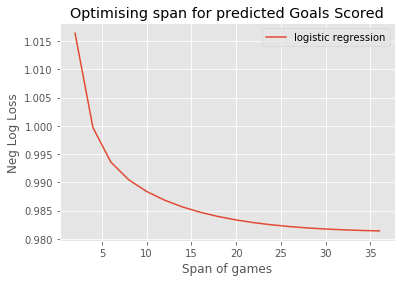

In [29]:
plt.style.use('ggplot')
plt.plot(list(range(2, 38, 2)), (pd.Series(cv_scores)*-1), label="logistic regression") # Plot our result
plt.title("Optimising span for predicted Goals Scored")
plt.xlabel("Span of games")
plt.ylabel("Neg Log Loss")
plt.legend()
print("The lowest span occured at " +str(lowest_span))
print("The lowest error was " +str(max(cv_scores)))

## Compare EMA and Moving average log loss

In [30]:
def track_best_span(input,av_method,classifier, model_vars):
    cv_scores = []
    lowest_span = 2
    for span in range(2, 46, 2):
        model_base = create_model_base(input,av_method,span,features)
        model_base = model_base.dropna()
        error = optimise_alpha_classifier(model_base,model_vars,"Result",classifier,"neg_log_loss")
        cv_scores.append(error)
        if error == max(cv_scores):
            lowest_span = span
    return cv_scores

In [31]:
ema_nr = track_best_span(training, ema_no_reset,lr,classifier_calc_vars)
ma_nr = track_best_span(training, moving_average_no_reset,lr,classifier_calc_vars)

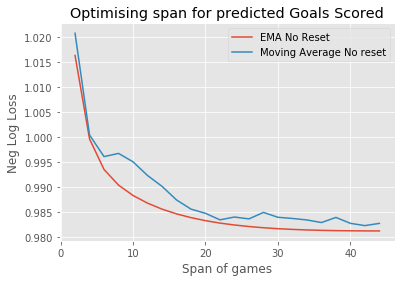

In [32]:
plt.style.use('ggplot')
plt.plot(list(range(2, 46, 2)), (pd.Series(ema_nr)*-1), label="EMA No Reset") # Plot our result
plt.plot(list(range(2, 46, 2)), (pd.Series(ma_nr)*-1), label="Moving Average No reset") # Plot our result
plt.title("Optimising span for predicted Goals Scored")
plt.xlabel("Span of games")
plt.ylabel("Neg Log Loss")
plt.legend()

## Compare accuracy and Log loss on training seasons

In [33]:
model_base = create_model_base(training,ema_no_reset,36,features)
X = model_base[classifier_calc_vars]
y = model_base["Result"]
le = LabelEncoder()
y = le.fit_transform(y)
clf = lr.fit(X,y)
print(metrics.accuracy_score(y, clf.predict(X)))
print(metrics.log_loss(y,clf.predict_proba(X)))


0.5315860215053764
0.9770336796677811


In [34]:
def create_model_probs_df(df,seasons,classifier,input_vars):
    base = df[df['season'].isin(seasons)].copy()
    predictions = pd.DataFrame(classifier.predict_proba(base[input_vars]),columns=list(le.classes_))
    pred_cols = ["Model_Prob_"+col for col in predictions.columns]
    predictions = predictions.rename(columns={col:'Model_Prob_'+col for col in predictions.columns})
    base = pd.concat([base,predictions],axis=1)
    base = base[merge_vars+team_vars+pred_cols]
    return base



# Gambling Returns

In [35]:
bookie_home_odds = "BookieHomeOdds"
bookie_draw_odds = "BookieDrawOdds"
bookie_away_odds = "BookieAwayOdds"
bookie_home_prob = "BookieHomeProb"
bookie_draw_prob = "BookieDrawProb"
bookie_away_prob = "BookieAwayProb"

model_home = "Model_Prob_H"
model_draw = "Model_Prob_D"
model_away = "Model_Prob_A"

stake = 5

In [36]:
def returns(stake, odds):
    returns = stake * odds - stake
    return returns


def expected_returns(stake, returns, model_prob):
    p = model_prob
    exp_returns = (returns * p) - ((1 - p) * stake)
    return exp_returns


def result_returns(row):
    # if np.isnan(row["PredResult"])==False:
    if row["Result"] == "H":
        return row["HomeReturns"]
    if row["Result"] == "D":
        return row["DrawReturns"]
    if row["Result"] == "A":
        return row["AwayReturns"]


def determine_bet(row):
    # if np.isnan(row["PredResult"])==False:
    if row["BestValueExpReturns"] == row["ExpHomeReturns"]:
        return "H"
    if row["BestValueExpReturns"] == row["ExpDrawReturns"]:
        return "D"
    if row["BestValueExpReturns"] == row["ExpAwayReturns"]:
        return "A"


def most_likely_result(home_prob, draw_prob, away_prob):
    most_likely = max(home_prob, draw_prob, away_prob)
    if most_likely == home_prob:
        return "H"
    if most_likely == draw_prob:
        return "D"
    if most_likely == away_prob:
        return "A"


def prediction_correct(result, prediction):
    if result == prediction:
        return 1
    else:
        return 0


def bet_index_cutoff(cutoff, bestindex):
    if bestindex >= cutoff:
        return 1
    else:
        return 0


def bet_profit(bet_correct, returns, bet_placed, stake):
    if bet_placed == 1:
        if bet_correct == 1:
            return returns
        else:
            return stake * -1
    else:
        return 0

In [37]:
def full_gambling_calc(df,stake,bookie_home_prob,bookie_draw_prob,bookie_away_prob,model_home,model_draw,model_away):
    gambling_df = df.copy()
    gambling_df["Stake"] = stake
    gambling_df["HomeReturns"]=gambling_df["BookieHomeOdds"].apply(lambda x: returns(stake,x))
    gambling_df["DrawReturns"]=gambling_df["BookieDrawOdds"].apply(lambda x: returns(stake,x))
    gambling_df["AwayReturns"]=gambling_df["BookieAwayOdds"].apply(lambda x: returns(stake,x))

    gambling_df["ResultReturns"]= gambling_df.apply(lambda row: result_returns(row), axis =1)

    gambling_df["ExpHomeReturns"] = gambling_df.apply(lambda row: 
                                                      expected_returns(row["Stake"],row["HomeReturns"],row[model_home])
                                                    , axis = 1)
    gambling_df["ExpDrawReturns"] = gambling_df.apply(lambda row: expected_returns(row.Stake,row.DrawReturns,row[model_draw])
                                                    , axis = 1)
    gambling_df["ExpAwayReturns"] = gambling_df.apply(lambda row: expected_returns(row.Stake,row.AwayReturns,row[model_away])
                                                    , axis = 1)

    gambling_df["BetIndexHome"] = gambling_df[model_home]/gambling_df[bookie_home_prob]
    gambling_df["BetIndexDraw"] = gambling_df[model_draw]/gambling_df[bookie_draw_prob]
    gambling_df["BetIndexAway"] = gambling_df[model_away]/gambling_df[bookie_away_prob]

    gambling_df["BestValueExpReturns"]= gambling_df[["ExpHomeReturns","ExpDrawReturns","ExpAwayReturns"]].max(axis=1)
    gambling_df["BestValueIndex"]=gambling_df[["BetIndexHome","BetIndexDraw","BetIndexAway"]].max(axis=1)
    
    gambling_df["BookiePrediction"]=gambling_df.apply(lambda row: most_likely_result(row[bookie_home_prob],row[bookie_draw_prob],
                                                                                    row[bookie_away_prob]),axis=1)
    gambling_df["ModelPrediction"]=gambling_df.apply(lambda row: most_likely_result(row[model_home],row[model_draw]
                                                                                    ,row[model_away]),axis =1)
    gambling_df["ValuePrediction"] = gambling_df.apply(lambda row: determine_bet(row),axis = 1)
    
    gambling_df["BookiePredCorrect"] = gambling_df.apply(lambda row: prediction_correct(row["Result"],row["BookiePrediction"]),axis=1)
    gambling_df["ModelPredCorrect"]= gambling_df.apply(lambda row:prediction_correct(row["Result"],row["ModelPrediction"]),axis=1)
    gambling_df["ValuePredCorrect"]= gambling_df.apply(lambda row:prediction_correct(row["Result"],row["ValuePrediction"]),axis=1)
    
    return gambling_df

# End to end application of simple model

In [38]:
model_ema = create_model_base(results,ema_no_reset,36,features)
model_base = create_model_probs_df(model_ema,[2014,2015,2016,2017,2018,2019],clf,classifier_calc_vars)
model_base.head()

,season,matchid,gw_no,fixture,matchdate,HomeTeam,AwayTeam,Model_Prob_A,Model_Prob_D,Model_Prob_H
0,2014,/matches/755324/,3,Burnley vs Manchester United,2014-08-30 12:45:00,Burnley,Manchester United,0.650460,0.205900,0.143640
1,2014,/matches/755327/,3,Manchester City vs Stoke City,2014-08-30 15:00:00,Manchester City,Stoke City,0.246249,0.206634,0.547118
2,2014,/matches/755328/,3,Newcastle United vs Crystal Palace,2014-08-30 15:00:00,Newcastle United,Crystal Palace,0.113784,0.273805,0.612411
3,2014,/matches/755329/,3,Queens Park Rangers vs Sunderland,2014-08-30 15:00:00,Queens Park Rangers,Sunderland,0.252476,0.258653,0.488871
4,2014,/matches/755330/,3,Swansea City vs West Bromwich Albion,2014-08-30 15:00:00,Swansea City,West Bromwich Albion,0.383443,0.300016,0.316541


In [39]:
odds_preds = pd.merge(model_base,odds_clean, on =["season","fixture"], how ="inner")
odds_preds = odds_preds.rename(columns={"FTR":"Result"})
gambling_df = odds_preds.copy()
gambling_output = full_gambling_calc(gambling_df,stake,bookie_home_prob,bookie_draw_prob,bookie_away_prob,model_home,model_draw,model_away)
gambling_output.head()

,season,matchid,gw_no,fixture,matchdate,HomeTeam,AwayTeam,Model_Prob_A,Model_Prob_D,Model_Prob_H,Result,bookie,BookieHomeOdds,BookieDrawOdds,BookieAwayOdds,BookieHomeProb,BookieDrawProb,BookieAwayProb,Stake,HomeReturns,DrawReturns,AwayReturns,ResultReturns,ExpHomeReturns,ExpDrawReturns,ExpAwayReturns,BetIndexHome,BetIndexDraw,BetIndexAway,BestValueExpReturns,BestValueIndex,BookiePrediction,ModelPrediction,ValuePrediction,BookiePredCorrect,ModelPredCorrect,ValuePredCorrect
0,2014,/matches/755324/,3,Burnley vs Manchester United,2014-08-30 12:45:00,Burnley,Manchester United,0.650460,0.205900,0.143640,D,Bet365,6.00,4.20,1.62,0.166667,0.238095,0.617284,5,25.00,16.00,3.10,16.00,-0.690807,-0.676093,0.268725,0.861839,0.864781,1.053745,0.268725,1.053745,A,A,A,0,0,0
1,2014,/matches/755327/,3,Manchester City vs Stoke City,2014-08-30 15:00:00,Manchester City,Stoke City,0.246249,0.206634,0.547118,A,Bet365,1.18,8.00,18.00,0.847458,0.125000,0.055556,5,0.90,35.00,85.00,85.00,-1.772006,3.265347,17.162384,0.645599,1.653069,4.432477,17.162384,4.432477,H,H,A,0,0,1
2,2014,/matches/755328/,3,Newcastle United vs Crystal Palace,2014-08-30 15:00:00,Newcastle United,Crystal Palace,0.113784,0.273805,0.612411,D,Bet365,1.75,3.75,5.25,0.571429,0.266667,0.190476,5,3.75,13.75,21.25,13.75,0.358593,0.133850,-2.013170,1.071719,1.026770,0.597366,0.358593,1.071719,H,H,H,0,0,0
3,2014,/matches/755329/,3,Queens Park Rangers vs Sunderland,2014-08-30 15:00:00,Queens Park Rangers,Sunderland,0.252476,0.258653,0.488871,H,Bet365,2.40,3.25,3.30,0.416667,0.307692,0.303030,5,7.00,11.25,11.50,7.00,0.866447,-0.796889,-0.834140,1.173289,0.840622,0.833172,0.866447,1.173289,H,H,H,1,1,1
4,2014,/matches/755330/,3,Swansea City vs West Bromwich Albion,2014-08-30 15:00:00,Swansea City,West Bromwich Albion,0.383443,0.300016,0.316541,H,Bet365,1.85,3.60,4.75,0.540541,0.277778,0.210526,5,4.25,13.00,18.75,4.25,-2.071998,0.400283,4.106783,0.585600,1.080057,1.821357,4.106783,1.821357,H,A,A,1,0,0


In [45]:
gambling_output["ValueRequirementMet"] = gambling_output.apply(lambda row: bet_index_cutoff(1.15,row["BestValueIndex"]),axis=1)
gambling_output["ModelPredProfit"] = gambling_output.apply(lambda row: 
                                                           bet_profit(row["ModelPredCorrect"],row["ResultReturns"],1,row["Stake"])
                                                          ,axis=1)
gambling_output["ValuePredProfit"] = gambling_output.apply(lambda row: 
                                                           bet_profit(row["ValuePredCorrect"],row["ResultReturns"],1,row["Stake"])
                                                          ,axis=1)
gambling_output["ValueCutoffProfit"] = gambling_output.apply(lambda row: 
                                                           bet_profit(row["ValuePredCorrect"],row["ResultReturns"]
                                                                      ,row["ValueRequirementMet"],row["Stake"])
                                                          ,axis=1)
gambling_output.groupby(["season","bookie"]).agg(BookieAcc=("BookiePredCorrect","mean")
                                        ,ModelAcc=("ModelPredCorrect","mean")
                                        ,ModelReturns=("ModelPredProfit","sum")
                                        ,ValueAcc=("ValuePredCorrect","mean")
                                        ,ValueReturns=("ValuePredProfit","sum")
                                        ,ValueCutoffReturns=("ValueCutoffProfit","sum")
                                        #,ModelResultProb=("FinalResultProb","mean")
                                        ,Counts=("fixture","nunique")
                                        ,ValueCutoffCounts=("ValueRequirementMet","sum")).reset_index()

,season,bookie,BookieAcc,ModelAcc,ModelReturns,ValueAcc,ValueReturns,ValueCutoffReturns,Counts,ValueCutoffCounts
0,2014,Bet365,0.541667,0.533333,66.65,0.294444,22.45,253.95,360,196
1,2015,Bet365,0.478610,0.475936,-171.55,0.323529,50.60,58.10,374,143
2,2016,Bet365,0.613757,0.579365,36.20,0.298942,-4.80,-31.80,378,188
3,2017,Bet365,0.550532,0.537234,-118.85,0.289894,180.10,286.65,376,173
4,2018,Bet365,0.588235,0.593583,88.40,0.310160,83.35,-1.35,374,189
5,2019,Bet365,0.525362,0.532609,-66.50,0.268116,-212.20,33.15,276,103


## Compare accuracy and log loss to Bookie per season

In [41]:
for i in [2014,2015,2016,2017,2018]:
    log_test = gambling_output[gambling_output["season"]==i].copy()
    y = log_test["Result"]
    le = LabelEncoder()
    y = le.fit_transform(y)
    print(str(i) + " Model log loss " + str(metrics.log_loss(y,log_test[["Model_Prob_A","Model_Prob_D","Model_Prob_H"]])))
    print(str(i) + " Bookie log loss " + str(metrics.log_loss(y,log_test[["BookieAwayProb","BookieDrawProb","BookieHomeProb"]])))

2014 Model log loss 0.9820095794253862
2014 Bookie log loss 0.9715931068323761
2015 Model log loss 1.04138212066805
2015 Bookie log loss 1.0338599362386478
2016 Model log loss 0.927925888742416
2016 Bookie log loss 0.9051049304960634
2017 Model log loss 0.9576323608458389
2017 Bookie log loss 0.946345472351005
2018 Model log loss 0.9004883101858685
2018 Bookie log loss 0.8933418817468733
